<a href="https://colab.research.google.com/github/dami163/Assignment/blob/main/Q_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

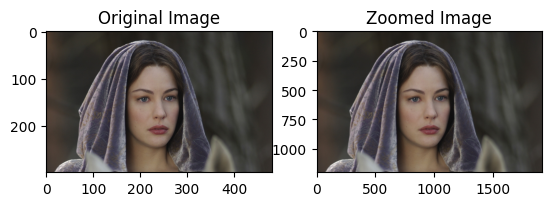

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img= cv.imread('im02small.png')
assert img is not None, "Image not found"


scale = 4

rows = int(scale * img.shape[0])
cols = int(scale * img.shape[1])

zoomed_image = np.zeros((rows, cols,img.shape[2]), dtype=np.uint8)
for i in range(0,rows):
    for j in range(0,cols):
        zoomed_image[i, j] = img[int(i / scale), int(j / scale)]

# Display the images

fig, ax= plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Zoomed Image')

plt.show()

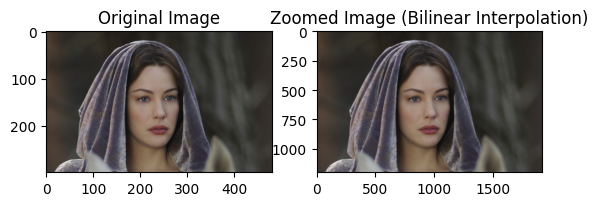

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#load image
im = cv.imread('im02small.png')
assert im is not None, "Image not found"

def bilinear_interpolation(image, scale):
    rows, cols, _ = image.shape
    new_rows = int(rows * scale)
    new_cols = int(cols * scale)
    zoomed_image = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

    for i in range(new_rows):
        for j in range(new_cols):
            # Calculate the position in the original image
            x = i / scale
            y = j / scale
            # Nearest neighbors
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, rows - 1), min(y1 + 1, cols - 1)
            # Bilinear interpolation weights
            dx, dy = x - x1, y - y1
            # Interpolation
            zoomed_image[i, j] = (1 - dx) * (1 - dy) * image[x1, y1] + \
                                  dx * (1 - dy) * image[x2, y1] + \
                                  (1 - dx) * dy * image[x1, y2] + \
                                  dx * dy * image[x2, y2]
    return zoomed_image



scale = 4
zoomed_image = bilinear_interpolation(im, scale)

# Display the images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Zoomed Image (Bilinear Interpolation)')
plt.show()